In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [53]:
student = pd.read_csv("student.csv")

In [54]:
student.head()

,id,name,class,mark,gender
0,1,John Deo,Four,75,female
1,2,Max Ruin,Three,85,male
2,3,Arnold,Three,55,male
3,4,Krish Star,Four,60,female
4,5,John Mike,Four,60,female


In [55]:
student.shape

(35, 5)

In [56]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      35 non-null     int64 
 1   name    35 non-null     object
 2   class   35 non-null     object
 3   mark    35 non-null     int64 
 4   gender  35 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


In [57]:
student.describe()

,id,mark
count,35.000000,35.000000
mean,18.000000,74.657143
std,10.246951,16.401117
min,1.000000,18.000000
25%,9.500000,62.500000
50%,18.000000,79.000000
75%,26.500000,88.000000
max,35.000000,96.000000


In [58]:
student.columns

Index(['id', 'name', 'class', 'mark', 'gender'], dtype='object')

In [59]:
pd.isnull(student).sum()

id        0
name      0
class     0
mark      0
gender    0
dtype: int64

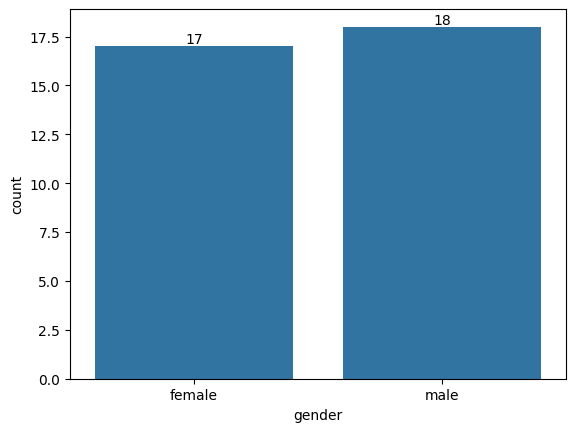

In [60]:
ax = sns.countplot(x = 'gender',data = student)
for i in ax.containers:
    ax.bar_label(i)

## Encode categorical variables

In [61]:
label_encoder_class = LabelEncoder()

In [62]:
label_encoder_gender = LabelEncoder()

In [65]:
student['class'] = label_encoder_class.fit_transform(student['class'])

In [66]:
student['gender'] = label_encoder_gender.fit_transform(student['gender'])

## Features and target

In [68]:
X = student[['class', 'gender']]

In [70]:
y = student['mark']

## Train-test split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model training

In [73]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Prediction

In [74]:
y_pred = model.predict(X_test)

# Evaluation

In [75]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 217.09391470495248
Coefficients: [ 0.7816092  -8.83836207]
Intercept: 75.64942528735631


## Plot actual vs predicted marks

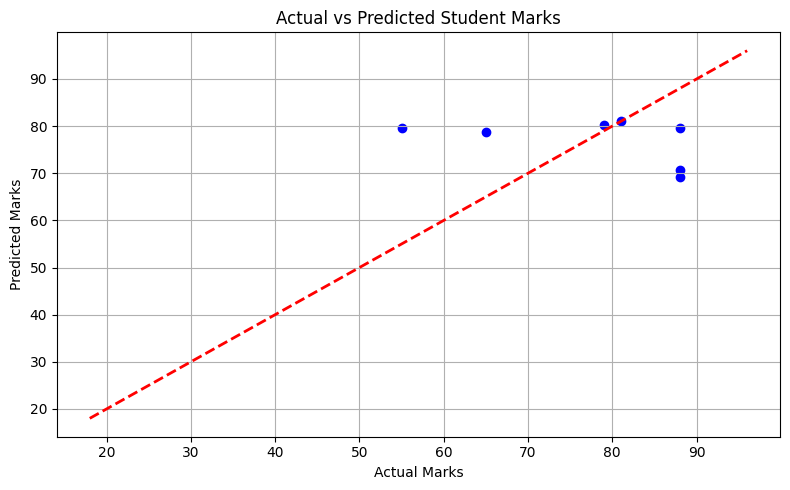

In [77]:
# Plot actual vs predicted marks
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.xlabel('Actual Marks')
plt.ylabel('Predicted Marks')
plt.title('Actual vs Predicted Student Marks')
plt.grid(True)
plt.tight_layout()
plt.show()

### Project Conclusion: Student Marks Prediction Using Machine Learning

##### We built a simple Linear Regression model to predict student marks using class and gender, achieving an MSE of 217.09. 
##### While predictions were fairly close, adding more features could improve accuracy.